<a href="https://colab.research.google.com/github/RainNP/Data_analytics_certificate_capstone_project/blob/main/Capstone_project_bike_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
all_file = [pd.read_csv("/content/gdrive/MyDrive/data/202111-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202112-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202201-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202202-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202203-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202204-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202205-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202206-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202207-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202208-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202209-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202210-divvy-tripdata.csv")]

In [ ]:
all_data = pd.concat([i for i in all_file],ignore_index = True)
all_data = all_data.drop_duplicates()
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.93,-87.72,41.96,-87.73,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.96,-87.70,41.92,-87.70,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.96,-87.70,41.96,-87.70,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.94,-87.79,41.93,-87.79,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.90,-87.63,41.88,-87.62,casual


In [ ]:
print(all_data.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


In [ ]:
all_data["started_at"] = pd.to_datetime(all_data["started_at"],format = "%Y-%m-%d %H:%M:%S")
all_data["ended_at"] = pd.to_datetime(all_data["ended_at"],format = "%Y-%m-%d %H:%M:%S")
all_data["ride_length"] = (all_data["ended_at"] - all_data["started_at"]).astype('timedelta64[m]')
all_data["day_of_week"] = all_data["started_at"].dt.day_name()
all_data["month"] = all_data["started_at"].dt.to_period('M')
all_data.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_length                  float64
day_of_week                   object
month                      period[M]
dtype: object

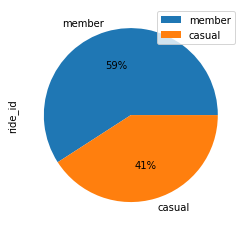

In [ ]:
all_data.groupby("member_casual").count().reindex(["member","casual"]).plot(kind='pie', y='ride_id',autopct='%1.0f%%')

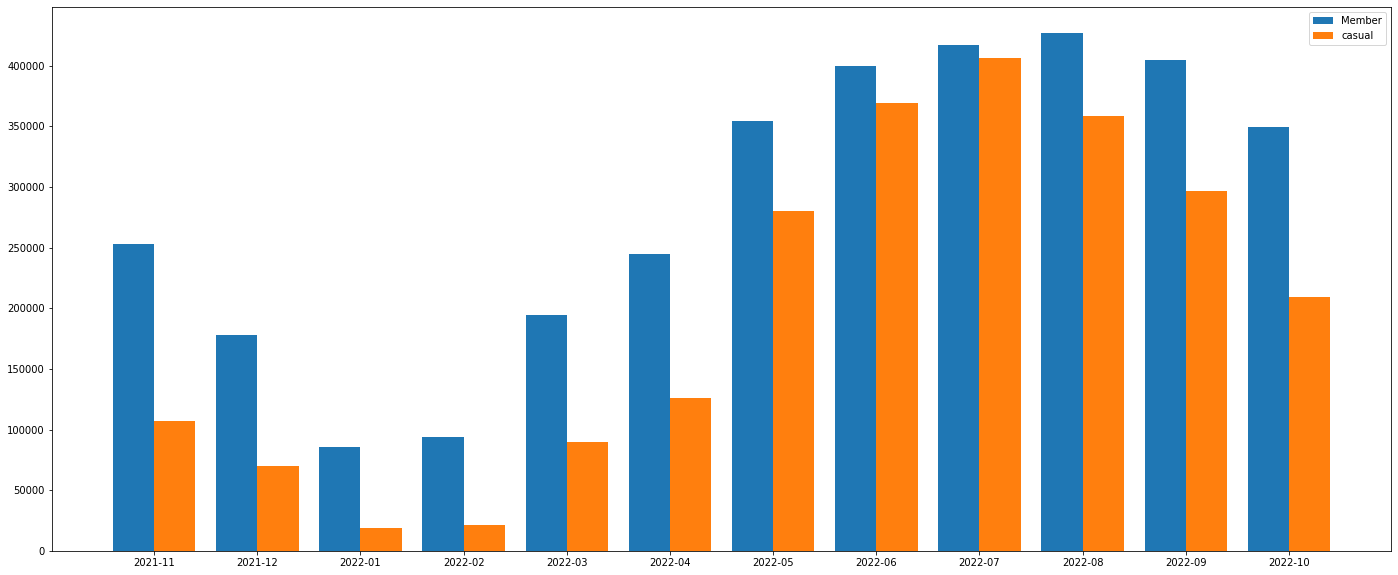

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data.month.unique()))
bar_width = 0.4

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(all_data.month.unique())

b1 = ax.bar(x, all_data.loc[all_data['member_casual'] == 'member',["ride_id","month"]].groupby("month").count()["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, all_data.loc[all_data['member_casual'] == 'casual',["ride_id","month"]].groupby("month").count()["ride_id"],width=bar_width,label='casual')
ax.legend()

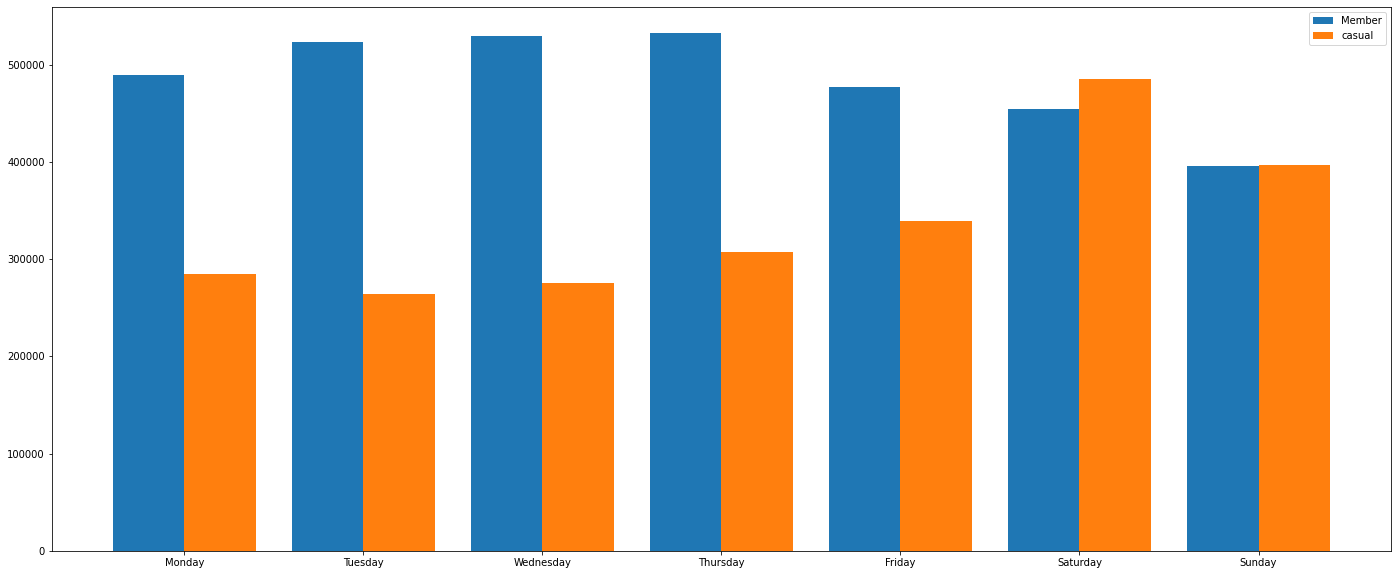

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data.day_of_week.unique()))
bar_width = 0.4
day_index = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(day_index)

b1 = ax.bar(x, all_data.loc[all_data['member_casual'] == 'member',["ride_id","day_of_week"]].groupby("day_of_week").count()["ride_id"].reindex(day_index),width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, all_data.loc[all_data['member_casual'] == 'casual',["ride_id","day_of_week"]].groupby("day_of_week").count()["ride_id"].reindex(day_index),width=bar_width,label='casual')
ax.legend()

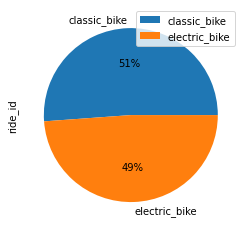

In [ ]:
member_bike = all_data.loc[all_data['member_casual'] == 'member',["ride_id","rideable_type"]]

member_bike.groupby("rideable_type").count().sort_values("rideable_type").plot(kind='pie', y='ride_id',autopct='%1.0f%%')

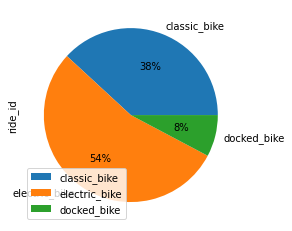

In [ ]:
casual_bike = all_data.loc[all_data['member_casual'] == 'casual',["ride_id","rideable_type"]]

casual_bike.groupby("rideable_type").count().reindex(["classic_bike","electric_bike","docked_bike"]).plot(kind='pie', y='ride_id',autopct='%1.0f%%')

In [ ]:
all_ride_length = all_data.loc[:,["ride_id","rideable_type","member_casual","month","day_of_week","ride_length"]]
#member_ride_length_by_month
all_ride_length.quantile([0,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.65,.70,.75,.80,.85,.90,.95,1])

,ride_length
0.00,-10354.0
0.05,2.0
0.10,3.0
0.15,4.0
0.20,5.0
0.25,5.0
0.30,6.0
0.35,7.0
0.40,8.0
0.45,9.0


In [ ]:
data_95 = all_ride_length[all_ride_length.ride_length > np.percentile(all_ride_length.ride_length,95)].index
data_5 = all_ride_length[all_ride_length.ride_length < np.percentile(all_ride_length.ride_length,5)].index
all_length_no_outliner = all_ride_length.drop(data_95)
all_length_no_outliner = all_length_no_outliner.drop(data_5)
all_length_no_outliner.describe()

,ride_length
count,5.253983e+06
mean,1.252299e+01
std,9.250347e+00
min,2.000000e+00
25%,6.000000e+00
50%,1.000000e+01
75%,1.700000e+01
max,4.500000e+01


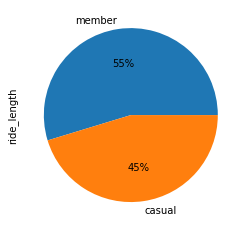

In [ ]:
all_length_no_outliner.groupby("member_casual")["ride_length"].sum().reindex(["member","casual"]).plot(kind='pie', y='ride_length',autopct='%1.0f%%')

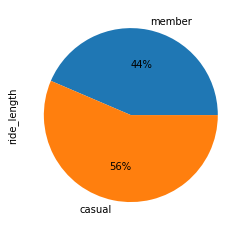

In [ ]:
all_length_no_outliner.groupby("member_casual")["ride_length"].mean().reindex(["member","casual"]).plot(kind='pie', y='ride_length',autopct='%1.0f%%')

In [ ]:
member_ride_length_by_month = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "member",["ride_id","month","ride_length"]].groupby("month").mean()
member_ride_length_by_month

,ride_length
month,
2021-11,10.006852
2021-12,9.903676
2022-01,9.669868
2022-02,9.840586
2022-03,10.497901
2022-04,10.370740
2022-05,11.885766
2022-06,12.342322
2022-07,12.249739


In [ ]:
casual_ride_length_by_month = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "casual",["ride_id","month","ride_length"]].groupby("month").mean()
casual_ride_length_by_month

,ride_length
month,
2021-11,13.165783
2021-12,12.971798
2022-01,12.027582
2022-02,12.802887
2022-03,15.256754
2022-04,15.022299
2022-05,15.893339
2022-06,15.341022
2022-07,15.133131


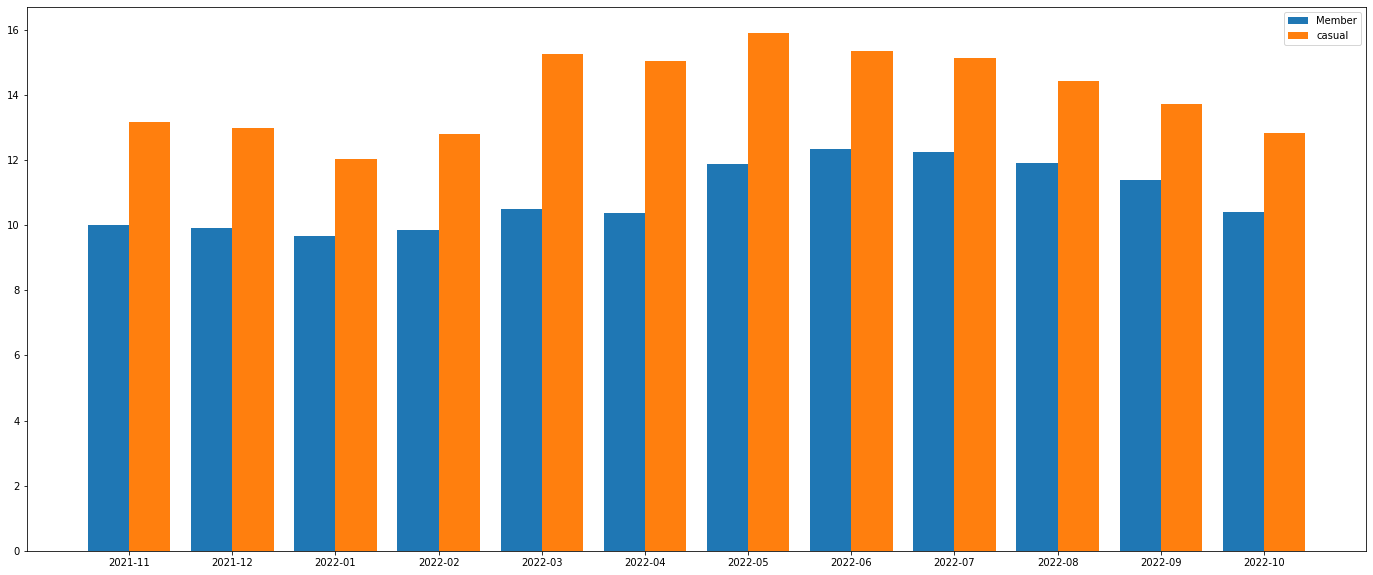

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data.month.unique()))
bar_width = 0.4

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(all_data.month.unique())

b1 = ax.bar(x, member_ride_length_by_month["ride_length"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_ride_length_by_month["ride_length"],width=bar_width,label='casual')
ax.legend()

In [ ]:
member_ride_length_by_week_day = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "member",["ride_id","day_of_week","ride_length"]].groupby("day_of_week").mean()

day_index = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

member_ride_length_by_week_day.reindex(day_index)

,ride_length
day_of_week,
Monday,10.886866
Tuesday,10.781058
Wednesday,10.862005
Thursday,10.930686
Friday,11.060032
Saturday,12.306535
Sunday,12.129153


In [ ]:
casual_ride_length_by_week_day = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "casual",["ride_id","day_of_week","ride_length"]].groupby("day_of_week").mean()
casual_ride_length_by_week_day.reindex(day_index)

,ride_length
day_of_week,
Monday,14.439822
Tuesday,13.431594
Wednesday,13.387832
Thursday,13.537723
Friday,14.189966
Saturday,15.847907
Sunday,15.805256


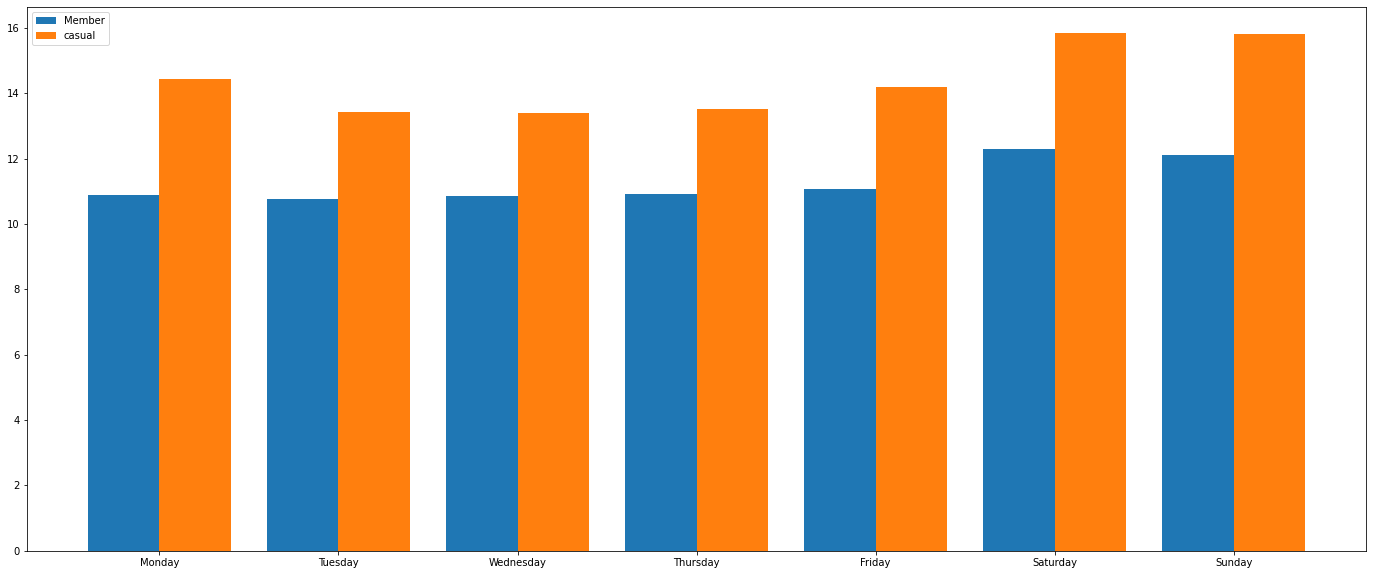

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data.day_of_week.unique()))
bar_width = 0.4
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(day_index)

b1 = ax.bar(x, member_ride_length_by_week_day["ride_length"].reindex(day_index),width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_ride_length_by_week_day["ride_length"].reindex(day_index),width=bar_width,label='casual')
ax.legend()

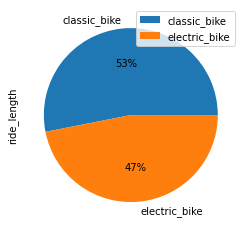

In [ ]:
member_ride_length_by_rideable = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "member",["ride_id","rideable_type","ride_length"]].groupby("rideable_type").mean()

member_ride_length_by_rideable.sort_values("rideable_type").plot(kind='pie', y='ride_length',autopct='%1.0f%%')

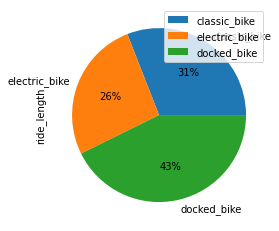

In [ ]:
casual_ride_length_by_rideable = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "casual",["ride_id","rideable_type","ride_length"]].groupby("rideable_type").mean()

casual_ride_length_by_rideable.reindex(["classic_bike","electric_bike","docked_bike"]).plot(kind='pie', y='ride_length',autopct='%1.0f%%')